In [1]:
import numpy as np
import torch
from helper_functions.helper_functions import NoiseAddition,DataNormalization, Interpolate, RandomHorizontalFlipBscan
from matplotlib import pyplot as plt

In [3]:
data=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\B-scans_all\data\param_fbh_gaussian_size10mm_depth10pct_thickness3mm_row_0180.npy',allow_pickle=True)
mask=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\B-scans_all\detection\param_fbh_gaussian_size10mm_depth10pct_thickness3mm_row_0180.npy',allow_pickle=True)
depth=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\B-scans_all\depth\param_fbh_gaussian_size10mm_depth10pct_thickness3mm_row_0180.npy',allow_pickle=True)

In [4]:
data=torch.from_numpy(data).unsqueeze(0).unsqueeze(0).float()
mask=torch.from_numpy(mask).unsqueeze(0).unsqueeze(0).float()
depth=torch.from_numpy(depth).unsqueeze(0).unsqueeze(0).float()

In [6]:
data=data.repeat(1,3,1,1)

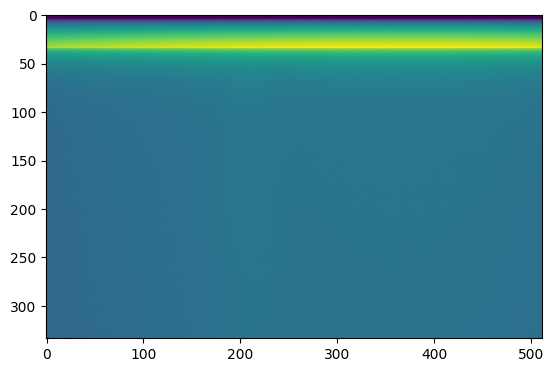

In [7]:
plt.imshow(data[0,0,:,:])

In [31]:
noise= NoiseAddition(0.05)
data_noise=noise(data)

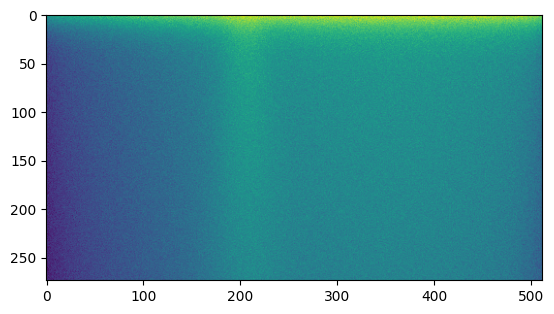

In [32]:
plt.imshow(data_noise[0,0,60:,:])